# Lab Assignment Three: Extending Logistic Regression 
In this lab, you will compare the performance of logistic regression optimization programmed in scikit-learn and via your own implementation. You will also modify the optimization procedure for logistic regression. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

## Dataset Selection

Select a dataset identically to the way you selected for the lab one (i.e., table data and you must have a mix of numeric and categorical variables). You are not required to use the same dataset that you used in the past, but you are encouraged. You must identify a classification task from the dataset that contains three or more classes to predict. That is it cannot be a binary classification; it must be multi-class prediction. 

## Grading Rubric

### Preparation and Overview (3 points total)
#### [2 points] Explain the task and what business-case or use-case it is designed to solve (or designed to investigate). Detail exactly what the classification task is and what parties would be interested in the results. For example, would the model be deployed or used mostly for offline analysis? As in previous labs, also detail how good the classifier needs to perform in order to be useful. 


<FONT COLOR="DARKGREEN">
    
Team Members: Aitor Gonzalez (49092725), Palmer Nelson (47066829), Abdul Wasay (49121481)
    
The dataset that is chosen for this task is downloaded from Kaggle. 
https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

The data currently has information on all players available in Fifa 2022. It includes statistics of their height, wage, value, age, club name, league name, position, nationality and players statistics. 

We want to use attributes pertaining to the player to predict the class of their value. To make it simpler, we will divide the value class into several ranges that are representative of the dataset for an accurate classification model. 
    
The main use for this model is football club managers to predict the values of their current players vs what salary they are paying them. This means that if they are overpaying their players, they can re-negotiate based on the values of other players with similar statistics. 
    
The model can also be turned into a predictor for new players entering the league, if the accuracy is good enough, the incoming player values can be determined using this model. It can help the team managers have better negotiation tactics so that they are not overpaying for the new players.  
    
The model accuracy we want from this is about 85% plus. Although there are always factors that may drive up the wages of certain players, more often than not, the base statistics of the players themselves is what determines their place within the league. And this is exactly what this model does, uses player statistics to predict salary ranges. 
    
This model serves to give team managers a way to determine what kind of salary they need to be paying that player, and with smaller teams, budgets are tight hence maximizing value of players is utmost importance in order to provide all the support for the team. The players costs are the greatest expense (apart from building stadiums that may be done once a couple of decades.) If managers can use this model to be better at predicting what to pay their players, it will help them balance their budgets accordingly and put resources in other areas that the team may need. 
    
The model itself needs to be private and for the top management of a team, hence it should not be deployed for mainstream usage. Instead, it should cater to the niche requirements for the team that it is being used for. Although we have not made these changes to the dataset, but if you were from a particular team, you could see how your players stack up against others and plan accordinlgy. There is however a need to keep the data up to date in order to reflect the current statistics for players and that needs to be done on a scheduled ongoing basis so that the statistics used to determine players wages reflect the current performance of the player.
</FONT>

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("players_22.csv")
pd.set_option('display.max_columns', None)

print (df.head())
df.describe()


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1

/var/folders/gj/w5w77sbx1fn23ts5hg4m7l_c0000gn/T/ipykernel_7410/2669345.py:6: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("players_22.csv")


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [15]:

print(df.dtypes)
print('===========')
print(df.info())

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None


#### [.5 points] (mostly the same processes as from previous labs) Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Provide a breakdown of the variables after preprocessing (such as the mean, std, etc. for all variables, including numeric and categorical). 
<FONT COLOR="DARKGREEN">
We will be removing the following columns from the dataset. The reasons are given alongside of each removal. 
    For the rest of the columns we have mentions as to what purpose they fulfil.

###### Original full set of columns
  ..   sofifa_id = col_double(), <font color="red">removed irrelevant to our usecase and is basically an internal ticker used by the dataset owner for the tracking of rows.</font><br />
  ..   player_url = col_character(),<font color="red">removed irrelevant to our usecase and it just links to the actual player page from where the data is scraped.</font><br />
  ..   short_name = col_character() - we keep this for now as it helps us identify the key players that may be outliers within the dataset,<br />
  ..   long_name = col_character(),<font color="red">removed irrelevant to our usecase as its purpose is fulfilled by short name.</font><br />
  ..   player_positions = col_character(),<font color="red">removed irrelevant to our usecase, and a lot of the poisitons are empty, hence we will be sing club positions instead to train the data</font><br />
  ..   overall = col_double(), this is the overall rating out of 100 for the player and super important for our use case. <br />
  ..   potential = col_double(), this is the main potential rating out 100 that is determined by how they play now and how hyped the player is in the market <br />
  ..   value_eur = col_double(), current value of player, although this may be an indicator of brnad value, <br />
  ..   wage_eur = col_double(), this will be the main class that we are going to predict<br />
  ..   age = col_double(), age is a great determinator of how much potential and life a player has left in the sport.<br />
  ..   dob = col_date(format = ""),<font color="red">removed irrelevant to our usecase, as age fulfils this requirement</font><br />
  ..   height_cm = col_double(), player metrics to train the model<br />
  ..   weight_kg = col_double(), player metrics to train the model<br />
  ..   club_team_id = col_double(),player club may contribute to the amount of money they ask or the salary they get paid, we believe it to be something that can influence the model<br />
  ..   club_name = col_character(), will be removed later, but keeping it now to determine outliers<br />
  ..   league_name = col_character(), will be removed later, but keeping it now to determine outliers<br />
  ..   league_level = col_double(), along with <br />
  ..   club_position = col_character(), this will be one hot encoded as a determining factor for wages<br />
  ..   club_jersey_number = col_double(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   club_loaned_from = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   club_joined = col_date(format = ""),<font color="red">removed irrelevant to our usecase</font><br />
  ..   club_contract_valid_until = col_double(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   nationality_id = col_double(), may provide insights on countries influencing the amount being paid to players<br />
  ..   nationality_name = col_character(), will be removed later, but keeping it now to determine outliers, its main purpose is fulfilled by nationality ID<br />
  ..   nation_team_id = col_double(),<font color="red">removed irrelevant to our usecase as a lot of players in our dataset do not play on a national team</font><br />
  ..   nation_position = col_character(),<font color="red">removed irrelevant to our usecase as a lot of players in our dataset do not play on a national team</font><br />
  ..   nation_jersey_number = col_double(),<font color="red">removed irrelevant to our usecase as a lot of players in our dataset do not play on a national team</font><br />
  ..   preferred_foot = col_character(), will be one hot encoded as a player metric<br />
  ..   weak_foot = col_double(), already one hot encoded<br />
  ..   skill_moves = col_double(),<br />
  ..   international_reputation = col_double(), kept as a determining factor for popularity<br />
  ..   work_rate = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   body_type = col_character(),<br />
  ..   real_face = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   release_clause_eur = col_double(),<br />
  ..   player_tags = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   player_traits = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   pace = col_double(), player metric <br />
  ..   shooting = col_double(), player metric <br />
  ..   passing = col_double(), player metric <br />
  ..   dribbling = col_double(), player metric <br />
  ..   defending = col_double(), player metric <br />
  ..   physic = col_double(), player metric <br />
  ..   attacking_crossing = col_double(), player metric <br />
  ..   attacking_finishing = col_double(), player metric <br />
  ..   attacking_heading_accuracy = col_double(), player metric <br />
  ..   attacking_short_passing = col_double(), player metric <br />
  ..   attacking_volleys = col_double(), player metric <br />
  ..   skill_dribbling = col_double(), player metric <br />
  ..   skill_curve = col_double(), player metric <br />
  ..   skill_fk_accuracy = col_double(), player metric <br />
  ..   skill_long_passing = col_double(), player metric <br />
  ..   skill_ball_control = col_double(), player metric <br />
  ..   movement_acceleration = col_double(), player metric <br />
  ..   movement_sprint_speed = col_double(), player metric <br />
  ..   movement_agility = col_double(), player metric <br />
  ..   movement_reactions = col_double(), player metric <br />
  ..   movement_balance = col_double(), player metric <br />
  ..   power_shot_power = col_double(), player metric <br />
  ..   power_jumping = col_double(), player metric <br />
  ..   power_stamina = col_double(), player metric <br />
  ..   power_strength = col_double(), player metric <br />
  ..   power_long_shots = col_double(), player metric <br />
  ..   mentality_aggression = col_double(), player metric <br />
  ..   mentality_interceptions = col_double(), player metric <br />
  ..   mentality_positioning = col_double(), player metric <br />
  ..   mentality_vision = col_double(), player metric <br />
  ..   mentality_penalties = col_double(), player metric <br />
  ..   mentality_composure = col_double(), player metric <br />
  ..   defending_marking_awareness = col_double(), player metric <br />
  ..   defending_standing_tackle = col_double(), player metric <br />
  ..   defending_sliding_tackle = col_double(), player metric <br />
  ..   goalkeeping_diving = col_double(), player metric <br />
  ..   goalkeeping_handling = col_double(), player metric <br />
  ..   goalkeeping_kicking = col_double(), player metric <br />
  ..   goalkeeping_positioning = col_double(), player metric <br />
  ..   goalkeeping_reflexes = col_double(), player metric <br />
  ..   goalkeeping_speed = col_double(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   ls = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   st = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rs = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lw = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lf = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   cf = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rf = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rw = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lam = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   cam = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   ram = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lcm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   cm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rcm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lwb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   ldm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   cdm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rdm = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rwb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   lcb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   cb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rcb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   rb = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   gk = col_character(),<font color="red">removed irrelevant to our usecase</font><br />
  ..   player_face_url = col_character(),<font color="red">removed irrelevant to our usecase as its a url to the site from where the data is scrapped from</font><br />
  ..   club_logo_url = col_character(),<font color="red">removed irrelevant to our usecase as its a url to the site from where the data is scrapped from</font><br />
  ..   club_flag_url = col_character(),<font color="red">removed irrelevant to our usecase as its a url to the site from where the data is scrapped from</font><br />
  ..   nation_logo_url = col_character(),<font color="red">removed irrelevant to our usecase as its a url to the site from where the data is scrapped from</font><br />
  ..   nation_flag_url = col_character()<font color="red">removed irrelevant to our usecase as its a url to the site from where the data is scrapped from</font><br />
  
</font>

In [16]:
#remove the unwanted columns
for col in ['sofifa_id',
            'player_url',
            'long_name',

            'player_positions',
            'dob',
            'nation_team_id',
            'nation_position',
            'nation_jersey_number',
            'work_rate',
            'real_face',
            'player_tags',
            'player_traits',

            'ls',
            'st',
            'rs',
            'lw',
            'lf',
            'cf',
            'rf',
            'rw',
            'lam',
            'cam',
            'ram',
            'lm',
            'lcm',
            'cm',
            'rcm',
            'rm',
            'lwb',
            'ldm',
            'cdm',
            'rdm',
            'rwb',
            'lb',
            'lcb',
            'cb',
            'rcb',
            'rb',
            'gk',            
            
            'club_jersey_number',
            'club_loaned_from',
            'club_joined',
            'club_contract_valid_until',
            'player_face_url',
            'club_logo_url',
            'club_flag_url',
            'nation_logo_url',
            'nation_flag_url',
            'goalkeeping_speed'
           ]:
    if col in df:
        del df[col]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   value_eur                    19165 non-null  float64
 4   wage_eur                     19178 non-null  float64
 5   age                          19239 non-null  int64  
 6   height_cm                    19239 non-null  int64  
 7   weight_kg                    19239 non-null  int64  
 8   club_team_id                 19178 non-null  float64
 9   club_name                    19178 non-null  object 
 10  league_name                  19178 non-null  object 
 11  league_level                 19178 non-null  float64
 12  club_position                19178 non-null  object 
 13  nationality_id  

<FONT COLOR="DARKGREEN">In the code below, we remove records that have null values. 
And replace values with 0 for the column release clause, assuming that these players have not negotiated a release clause within their contract. </font>

In [17]:
df = df.dropna(subset=['pace'])
df = df.dropna(subset=['value_eur'])
df['release_clause_eur'].fillna(0, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17041 entries, 0 to 19238
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   17041 non-null  object 
 1   overall                      17041 non-null  int64  
 2   potential                    17041 non-null  int64  
 3   value_eur                    17041 non-null  float64
 4   wage_eur                     17041 non-null  float64
 5   age                          17041 non-null  int64  
 6   height_cm                    17041 non-null  int64  
 7   weight_kg                    17041 non-null  int64  
 8   club_team_id                 17041 non-null  float64
 9   club_name                    17041 non-null  object 
 10  league_name                  17041 non-null  object 
 11  league_level                 17041 non-null  float64
 12  club_position                17041 non-null  object 
 13  nationality_id       

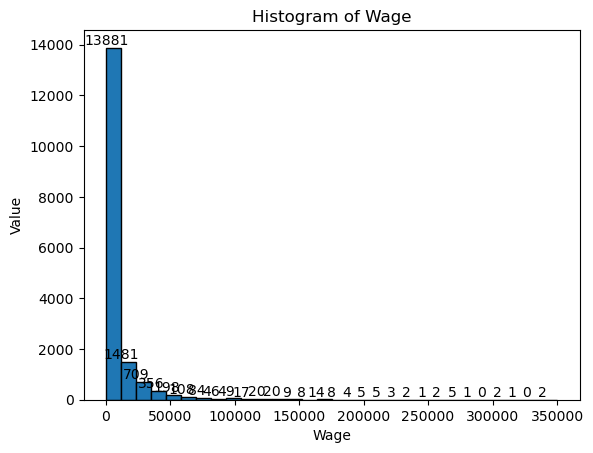

In [6]:
n, bins, patches = plt.hist(df['wage_eur'], bins=30, edgecolor='black')


# Add labels and title
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Histogram of Wage')

# Annotate each bin with its count
for i in range(len(patches)):
    plt.text(bins[i] + 5, n[i], str(int(n[i])), ha='center', va='bottom')

# Display the box plot
plt.show()

<FONT COLOR="DARKGREEN">
In order to be able to have a class to be predicted, we studied the wage column and determined it to have 4 distinct classes. Low (0 to 25,0000), Medium (25000 to 50000), High (50000 to 100000) and Super (100000 to 350000)
    
   This is to make our task easier and have distinct 4 classes to predict using the training data. 
</FONT>

In [18]:
# Define the bin edges and labels
bins = [0,25000, 50000, 100000, 350000]
labels = [1, 2, 3, 4]
#labels = ['Low', 'Moderate', 'High', 'Super']

# Use pd.cut() to create wage classes
df['Wage_Class'] = pd.cut(df['wage_eur'], bins=bins, labels=labels)

# Display the DataFrame with wage classes
df.head()

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Wage_Class
0,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,52,Argentina,Left,4,4,5,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,4
1,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,37,Poland,Right,4,4,5,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,4
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,38,Portugal,Right,4,5,5,Unique,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,4
3,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,54,Brazil,Right,5,5,5,Unique,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,4
4,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,7,Belgium,Right,5,4,4,Unique,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,4


In [8]:
df_new = df[['wage_eur', 'Wage_Class']]

# Print the new DataFrame
print(df_new)

       wage_eur Wage_Class
0      320000.0          4
1      270000.0          4
2      270000.0          4
3      270000.0          4
4      350000.0          4
...         ...        ...
19234    1000.0          1
19235     500.0          1
19236     500.0          1
19237     500.0          1
19238     500.0          1

[17041 rows x 2 columns]


In [13]:
ds_data.dtypes 

overall                           int64
potential                         int64
age                               int64
height_cm                         int64
weight_kg                         int64
club_team_id                    float64
league_level                    float64
nationality_id                    int64
weak_foot                         int64
skill_moves                       int64
international_reputation          int64
release_clause_eur              float64
pace                            float64
shooting                        float64
passing                         float64
dribbling                       float64
defending                       float64
physic                          float64
attacking_crossing                int64
attacking_finishing               int64
attacking_heading_accuracy        int64
attacking_short_passing           int64
attacking_volleys                 int64
skill_dribbling                   int64
skill_curve                       int64


In [10]:
ds_target.dtypes

Wage_Class    category
dtype: object

In [11]:
df.describe(percentiles=[.25, .5, .75])

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,nationality_id,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,17041.000000,17041.000000,1.704100e+04,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,...,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000,17041.000000
mean,65.930286,71.243061,2.965082e+06,9354.732703,25.065959,180.389179,74.089314,50445.974415,1.356376,58.788745,...,51.485535,60.019835,50.699137,52.315768,49.920427,10.346165,10.393815,10.359721,10.372279,10.331377
std,6.773755,6.048461,7.717024e+06,19880.724994,4.605071,6.545547,6.696454,54392.633811,0.749833,50.216198,...,12.399882,10.262801,17.369045,18.449722,18.354884,3.014197,2.996654,3.038031,3.003834,3.033476
min,47.000000,49.000000,1.500000e+04,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,...,13.000000,30.000000,10.000000,10.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,62.000000,67.000000,5.250000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,21.000000,...,42.000000,53.000000,37.000000,37.000000,34.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,1.000000e+06,3000.000000,25.000000,180.000000,74.000000,1936.000000,1.000000,45.000000,...,51.000000,60.000000,55.000000,59.000000,56.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,70.000000,75.000000,2.100000e+06,9000.000000,28.000000,185.000000,78.000000,111138.000000,1.000000,60.000000,...,61.000000,67.000000,64.000000,66.000000,64.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,39.000000,203.000000,110.000000,115820.000000,5.000000,219.000000,...,93.000000,96.000000,93.000000,93.000000,92.000000,32.000000,33.000000,38.000000,33.000000,37.000000


# Description of final data set

<font color="darkgreen">
Our final data set contains 61 features and 19239 rows. We replaced all null values with 0’s. We created a categorical feature to represent our target. The ‘wage_class’ feature contains 4 labels (0-4) that represent our wage level labels (low, medium, high and, super). The mean for our wage_level is “high’. So overall we can infer that the majority of players should be paid at the ‘high’ or ‘super’ level. The standard deviation for this feature is 19880.72, meaning there is a high variance of data for the wage_level feature. Furthermore, our target likely has many outliers on the top and bottom end. According to the data, older players are paid more and if a player manages to play long enough to move up in the age distribution, their pay triples as they move from the youngest 25% to middle 50% and oldest 75% of the data set.

</font>


#### [.5 points] Divide your data into training and testing data using an 80% training and 20% testing split. Use the cross validation modules that are part of scikit-learn. Argue "for" or "against" splitting your data using an 80/20 split. That is, why is the 80/20 split appropriate (or not) for your dataset?  



In [9]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

#one hot encoding categorical data
#categorical_cols = ['club_position', 'preferred_foot', 'body_type'] 

#df_ohe = pd.get_dummies(df, columns = categorical_cols)

# Split the DataFrame into two DataFrames: ds.target and ds.data
#ds_data = df_ohe.drop(columns=['short_name', 'wage_eur', 'value_eur', 'club_name', 'league_name', 'nationality_name'])


ds_data = df.drop(columns=['short_name', 'wage_eur', 'value_eur', 'club_name', 'league_name', 'nationality_name','club_position', 'preferred_foot', 'body_type'])

ds_target = df[['Wage_Class']]

# Print the ds.data and ds.target DataFrames
# print(ds_data)
# print(ds_target)

X = ds_data
y = ds_target # note problem is NOT binary anymore, there are three classes!

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)


CPU times: user 432 ms, sys: 136 ms, total: 568 ms
Wall time: 802 ms


In [31]:
%%time
from sklearn.metrics import accuracy_score

lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train,y_train.values.ravel())
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test)
print('Accuracy of 80/20 Split of data on regaular SKlearn Regression: ',accuracy_score(y_test,yhat))

[[ 1.96680750e-04 -4.40494770e-03  6.01030891e-03 -3.02395374e-03
   3.27940403e-02  8.85966562e-03  1.61674743e-05  1.02021798e-03
  -1.05590850e-03  4.07722720e-04 -1.88840614e-04 -6.87938734e-04
  -1.12459234e-07  8.47315207e-03 -5.03692097e-03 -4.01831108e-03
  -2.03119292e-03 -4.47657893e-03 -2.19299324e-04 -5.38899734e-03
  -3.54439453e-03 -9.27987631e-03 -4.14080720e-03 -6.96958504e-03
  -3.03411246e-03 -6.10239266e-03 -3.28606176e-03 -3.95659615e-03
  -4.34346259e-03  9.63736997e-03  7.50230874e-03  7.52801810e-03
  -7.40939991e-03  1.24257252e-02 -7.42434485e-03  1.52556406e-03
   5.62329003e-03 -9.16423090e-04 -6.43442176e-03 -6.27750273e-03
  -4.38701917e-03 -3.77636160e-03 -2.26731679e-03 -2.95354970e-03
  -7.90794716e-03 -6.02459898e-03 -2.49452429e-03 -9.93138490e-04
   1.44503021e-03  1.70756072e-03  1.27761321e-03  1.73564347e-03
   1.43722568e-03 -3.58910357e-03]
 [-1.38169697e-05 -8.41437238e-04 -9.54164643e-04 -3.17481060e-04
  -2.50357770e-03 -1.02028657e-03 -2.0226

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Assuming you have your feature matrix X and target variable y
# X and y should be numpy arrays or pandas DataFrames/Series
# Split the data into an 80/20 train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

model = LogisticRegression(max_iter=1000)  # Default is 100

# 5-fold cross-validation)
num_folds = 5
scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

# Fit the model on the training data (optional, if you want to train on the entire training set)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)

# Print the results
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.2f}')
print(f'Accuracy of 10/90 Split of data on regaular SKlearn Regression: : {test_accuracy:.2f}')

Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.00
Accuracy of 10/90 Split of data on regaular SKlearn Regression: : 0.92


In [27]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have your feature matrix X and target variable y
# X and y should be numpy arrays or pandas DataFrames/Series
# Split the data into an 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LogisticRegression(max_iter=500)

# 5-fold cross-validation)
num_folds = 5
scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

# Fit the model on the training data (optional, if you want to train on the entire training set)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)

# Print the results
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.2f}')
print(f'Accuracy of 90/10 Split of data on regaular SKlearn Regression:  {test_accuracy:.2f}')

Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.00
Accuracy of 90/10 Split of data on regaular SKlearn Regression:  0.93


In [28]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have your feature matrix X and target variable y
# X and y should be numpy arrays or pandas DataFrames/Series
# Split the data into an 80/20 train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=500)

# 5-fold cross-validation)
num_folds = 5
scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

# Fit the model on the training data (optional, if you want to train on the entire training set)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)

# Print the results
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.2f}')
print(f'Accuracy of 50/50 Split of data on regaular SKlearn Regression:  {test_accuracy:.2f}')

Mean Cross-Validation Accuracy: 0.91
Standard Deviation of Cross-Validation Accuracy: 0.00
Accuracy of 50/50 Split of data on regaular SKlearn Regression:  0.91


In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have your feature matrix X and target variable y
# X and y should be numpy arrays or pandas DataFrames/Series
# Split the data into an 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)

# 5-fold cross-validation)
num_folds = 5
scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

# Fit the model on the training data (optional, if you want to train on the entire training set)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)

# Print the results
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.2f}')
print(f'Accuracy of 20/80 Split of data on regaular SKlearn Regression {test_accuracy:.2f}')

Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.00
Accuracy of 20/80 Split of data on regaular SKlearn Regression 0.91


# Justification for using or not using 80/20 dataset

<font color="darkgreen">
The choice of splitting a multiclass training and testing set into an 80/20 ratio, or any specific split ratio, is not a fixed rule but rather a common convention. The split ratio is typically determined by various factors, including the size of your dataset, the complexity of the problem, and the availability of data. Since our data set contains 62 features and nearly 20,000 rows, we felt that 80/20 was an appropriate split of the data. The runtime of training on a standard 80/20 split was feasible for our dataset. Had the dataset been shorter, we would have considered a 90/10 split.

That being said, we did test above some different cuts of the data to see how regular SKlogistic regression performs on differently split data. 
    
As per the results below:
    
Accuracy of 80/20 Split of data on regaular SKlearn Regression:  0.92

Accuracy of 10/90 Split of data on regaular SKlearn Regression: : 0.92

Accuracy of 90/10 Split of data on regaular SKlearn Regression:  0.93

Accuracy of 50/50 Split of data on regaular SKlearn Regression:  0.91

Accuracy of 20/80 Split of data on regaular SKlearn Regression 0.91
    
We got marginally different results based on the split, hence stayed with the convention of 80/20 as it yeilded pretty accurate results. 
    

</font>

### Modeling (5 points total)
The implementation of logistic regression must be written only from the examples given to you by the instructor. No credit will be assigned to teams that copy implementations from another source, regardless of if the code is properly cited. 

## TESTING ON PROFESSORS UNMODIFIED CLASSES

In [21]:
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)


class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

            
blr = BinaryLogisticRegression(0.1)
print(blr)


class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)
    
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(0.1,1500)
print(lr)

Base Binary Logistic Regression Object, Not Trainable
Untrained Binary Logistic Regression Object
Untrained MultiClass Logistic Regression Object


In [22]:
%%time
X = ds_data.values
y = ds_target.values
y = y.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)

CPU times: total: 15.6 ms
Wall time: 15.9 ms


In [23]:
%%time
lr = LogisticRegression(0.1,500)
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

MultiClass Logistic Regression Object with coefficients:
[[ 1.90850866e+01  1.21968526e+03  1.33107034e+03  4.71767826e+02
   3.44038911e+03  1.40942144e+03  1.00381812e+06  2.73429247e+01
   1.11108356e+03  5.63877384e+01  4.59924663e+01  1.83808025e+01
   6.43224472e+04  1.28787912e+03  9.57699490e+02  1.05329387e+03
   1.15586631e+03  9.59755913e+02  1.21508568e+03  9.91388718e+02
   9.19392099e+02  1.04768596e+03  1.15903806e+03  8.41514994e+02
   1.12138716e+03  9.33473364e+02  8.36894975e+02  1.03811189e+03
   1.16828674e+03  1.28847826e+03  1.28682625e+03  1.25295720e+03
   1.13415479e+03  1.26525580e+03  1.08571495e+03  1.24455695e+03
   1.26230329e+03  1.23480381e+03  9.29571215e+02  1.09674784e+03
   9.35656250e+02  1.01425047e+03  1.02313801e+03  9.52812163e+02
   1.09873298e+03  9.38688784e+02  9.73944462e+02  9.32301042e+02
   1.97156595e+02  1.98260098e+02  1.97271439e+02  1.97770951e+02
   1.96732824e+02  1.58635857e+01]
 [-5.05199531e+00 -3.15097469e+02 -3.48639074e+02 

#### [2 points] Create a custom, one-versus-all logistic regression classifier using numpy and scipy to optimize. Use object oriented conventions identical to scikit-learn. You should start with the template developed by the instructor in the course. You should add the following functionality to the logistic regression classifier: Ability to choose optimization technique when class is instantiated: either steepest ascent, stochastic gradient ascent, and {Newton's method/Quasi Newton methods}. 

## Testing with adding optimizer to classes (steepest ascent,  stochastic gradient ascent, and Newton's method)

In [68]:
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)


class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))

# NEW METHODS
    def _get_gradient_steepest_ascent(self, X, y):
        ydiff = y - self.predict_proba(X, add_intercept=False).ravel()
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        return gradient.reshape(self.w_.shape)

    def _get_gradient_stochastic(self, X, y):
        rand_index = np.random.randint(0, len(y))
        xi = X[rand_index, :].reshape(1, -1)
        yi = y[rand_index]
        gradi = (yi - self.predict_proba(xi, add_intercept=False)) * xi
        return gradi.reshape(self.w_.shape)

    def _get_gradient_newton(self, X, y):
        p = self.predict_proba(X, add_intercept=False).ravel()
        W = np.diag(p * (1 - p))
        gradient = X.T @ (y - p)
        hessian = -X.T @ W @ X
        
        # DEBUG
        det_hessian = np.linalg.det(hessian)
        if det_hessian == 0:
            print("Singular Hessian matrix. Can't invert.")
        
        # PINV not INV !!!!!
        return np.linalg.pinv(hessian) @ gradient

# MODIFIED FIT() TO ACCEPT +1 PARAMETER OPTIMIZER
    # public:
    def fit(self, X, y, optimizer='normal'):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        print(f"optimizer used: {optimizer}")
        for _ in range(self.iters):
            if optimizer   == 'normal':
                gradient   =   self._get_gradient(Xb,y)
            elif optimizer == 'steepest_ascent':
                gradient   =   self._get_gradient_steepest_ascent(Xb, y)
            elif optimizer == 'uld':
                gradient   =   self._get_gradient_stochastic(Xb, y)
            elif optimizer == 'newton_method':
                gradient   =   self._get_gradient_newton(Xb, y)
            else:
                raise ValueError("Invalid optimizer. Choose from 'normal', steepest_ascent', 'stochastic_gradient_ascent', or 'newton_method'.")
            #print("Shape of gradient:", gradient.shape)
            #print("Shape of self.w_:", self.w_.shape)
            
            self.w_ += gradient.reshape(-1, 1) * self.eta
# debug            self.w_ += gradient*self.eta # multiply by learning rate 
            
blr = BinaryLogisticRegression(0.1)
print(blr)


class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
"""    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)
"""

class LogisticRegression:
    def __init__(self, eta, iterations=20, optimizer='normal'):
        print(f"optimizer received: {optimizer}")
        self.eta       = eta
        self.iters     = iterations
        self.optimizer = optimizer
        print(f"optimizer stored: {self.optimizer}")
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            print("iteration for each class")
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta, self.iters)
            blr.fit(X,y_binary, self.optimizer)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(0.1,1500)
print(lr)

Base Binary Logistic Regression Object, Not Trainable
Untrained Binary Logistic Regression Object
optimizer received: normal
optimizer stored: normal
Untrained MultiClass Logistic Regression Object


<font color="darkgreen">

# Classes
We have modified the classes to take on an omptimizer parameter (if not provided it defaults to 'normal" which is the previous behavior).
We also have integrated implementations for _steepest ascent_ , _gradient stochastic_, and _newton method_
    
This parameter is passed on in calls and stored as a data member so that the BinaryLogisticRegression(BinaryLogisticRegressionBase) fit() method can handle four different optimizers.
    
LogisticRegression class uses temporary composition (local object instance to the fit() method)
    
    blr = VectorBinaryLogisticRegression(self.eta, self.iters)
to access the behaviour of VectorBinaryLogisticRegression(BinaryLogisticRegression).
Through the use of inheritance 

    VectorBinaryLogisticRegression <- BinaryLogisticRegression <- BinaryLogisticRegressionBase
the base class behaviours are accessed.
    
    
</font>

In [69]:
%%time
lr = LogisticRegression(0.1, iterations=500, optimizer='normal')
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))


optimizer received: normal
optimizer stored: normal
iteration for each class
optimizer used: normal
iteration for each class
optimizer used: normal
iteration for each class
optimizer used: normal
iteration for each class
optimizer used: normal
MultiClass Logistic Regression Object with coefficients:
[[ 1.90850866e+01  1.21968526e+03  1.33107034e+03  4.71767826e+02
   3.44038911e+03  1.40942144e+03  1.00381812e+06  2.73429247e+01
   1.11108356e+03  5.63877384e+01  4.59924663e+01  1.83808025e+01
   6.43224472e+04  1.28787912e+03  9.57699490e+02  1.05329387e+03
   1.15586631e+03  9.59755913e+02  1.21508568e+03  9.91388718e+02
   9.19392099e+02  1.04768596e+03  1.15903806e+03  8.41514994e+02
   1.12138716e+03  9.33473364e+02  8.36894975e+02  1.03811189e+03
   1.16828674e+03  1.28847826e+03  1.28682625e+03  1.25295720e+03
   1.13415479e+03  1.26525580e+03  1.08571495e+03  1.24455695e+03
   1.26230329e+03  1.23480381e+03  9.29571215e+02  1.09674784e+03
   9.35656250e+02  1.01425047e+03  1.02

In [26]:
%%time
lr = LogisticRegression(0.1, iterations=30, optimizer='newton_method')
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))


optimizer received: newton_method
optimizer stored: newton_method
iteration for each class
optimizer used: newton_method
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
iteration for each class
optimizer used: newton_method
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singular Hessian matrix. Can't invert.
Singu

In [27]:
%%time
lr = LogisticRegression(0.1, iterations=500, optimizer='uld')
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))


optimizer received: uld
optimizer stored: uld
iteration for each class
optimizer used: uld
iteration for each class
optimizer used: uld
iteration for each class
optimizer used: uld
iteration for each class
optimizer used: uld
MultiClass Logistic Regression Object with coefficients:
[[ 2.2850000e+01  1.4532000e+03  1.5912000e+03  5.5995000e+02
   4.1168500e+03  1.6844000e+03  1.2856289e+06  3.2350000e+01
   1.2725000e+03  6.5250000e+01  5.3100000e+01  2.2050000e+01
   2.5190000e+05  1.5292000e+03  1.1064000e+03  1.2433500e+03
   1.3638500e+03  1.1990500e+03  1.4513500e+03  1.1572000e+03
   1.0474500e+03  1.2490500e+03  1.3780500e+03  9.6530000e+02
   1.3153500e+03  1.0845500e+03  9.7260000e+02  1.2420500e+03
   1.3797500e+03  1.5285500e+03  1.5300500e+03  1.4900500e+03
   1.3477500e+03  1.5225500e+03  1.2885000e+03  1.4923000e+03
   1.5239500e+03  1.4600000e+03  1.0673000e+03  1.3272000e+03
   1.1727500e+03  1.1828500e+03  1.2008500e+03  1.1079500e+03
   1.3057500e+03  1.1744000e+03  1.

In [28]:
%%time
lr = LogisticRegression(0.1, iterations=500, optimizer='steepest_ascent')
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))


optimizer received: steepest_ascent
optimizer stored: steepest_ascent
iteration for each class
optimizer used: steepest_ascent
iteration for each class
optimizer used: steepest_ascent
iteration for each class
optimizer used: steepest_ascent
iteration for each class
optimizer used: steepest_ascent
MultiClass Logistic Regression Object with coefficients:
[[ 1.90850866e+01  1.21968526e+03  1.33107034e+03  4.71767826e+02
   3.44038911e+03  1.40942144e+03  1.00381812e+06  2.73429247e+01
   1.11108356e+03  5.63877384e+01  4.59924663e+01  1.83808025e+01
   6.43224472e+04  1.28787912e+03  9.57699490e+02  1.05329387e+03
   1.15586631e+03  9.59755913e+02  1.21508568e+03  9.91388718e+02
   9.19392099e+02  1.04768596e+03  1.15903806e+03  8.41514994e+02
   1.12138716e+03  9.33473364e+02  8.36894975e+02  1.03811189e+03
   1.16828674e+03  1.28847826e+03  1.28682625e+03  1.25295720e+03
   1.13415479e+03  1.26525580e+03  1.08571495e+03  1.24455695e+03
   1.26230329e+03  1.23480381e+03  9.29571215e+02  

### Update the gradient calculation to include a customizable regularization term (either using no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization). Associate a cost with the regularization term, "C", that can be adjusted when the class is instantiated.  

Now we will update the classes to add regularization terms and cost terms. 

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
        
blr = BinaryLogisticRegressionBase(0.1)
print(blr)


class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __init__(self, eta, iterations=20, regularization=None, C=1.0):
        super().__init__(eta, iterations)
        self.regularization = regularization
        self.C = C
                
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y,regularization,C):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        gradient = self.add_regularization(gradient,regularization,C)
        return gradient/float(len(y))

# NEW METHODS
    def _get_gradient_steepest_ascent(self, X, y,regularization,C):
        y_array = np.array(y).ravel()  # Convert to NumPy array if it isn't
        ydiff = y_array - self.predict_proba(X, add_intercept=False).ravel()
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        gradient = self.add_regularization(gradient,regularization,C)
        return gradient.reshape(self.w_.shape)

#     def _get_gradient_stochastic(self, X, y,regularization,C):
#         rand_index = np.random.randint(0, len(y))
#         xi = X[rand_index, :].reshape(1, -1)
#         yi = y[rand_index]
#         gradi = (yi - self.predict_proba(xi, add_intercept=False)) * xi
#         gradi = self.add_regularization(gradi,regularization,C)
#         return gradi.reshape(self.w_.shape)
    def _get_gradient_stochastic(self, X, y, regularization, C):
        rand_index = np.random.randint(0, len(y))
        xi = X[rand_index, :].reshape(1, -1)
        yi = y[rand_index]
        gradi = (yi - self.predict_proba(xi, add_intercept=False)) * xi

        # Ensure that gradi is a column vector
        gradi = gradi.reshape(self.w_.shape)
        gradi = self.add_regularization(gradi, regularization, C)

        return gradi


    def _get_gradient_newton(self, X, y,regularization,C):
        p = self.predict_proba(X, add_intercept=False).ravel()
        W = np.diag(p * (1 - p))
        gradient = X.T @ (y - p)
        hessian = -X.T @ W @ X
        
        # DEBUG
        det_hessian = np.linalg.det(hessian)
        #if det_hessian == 0:
            #print("Singular Hessian matrix. Can't invert.")
        
        gradient = self.add_regularization(gradient,regularization,C)
        # PINV not INV !!!!!
        return np.linalg.pinv(hessian) @ gradient

    



    def add_regularization(self, gradient, regularization, C):
        w_flattened = self.w_[1:].flatten()

        # Ensure the shapes align
        w_flattened = w_flattened.reshape(gradient[1:].shape)

        if regularization == 'l1':
            gradient[1:] += -C * np.sign(w_flattened)
        elif regularization == 'l2':
            gradient[1:] += -2 * C * w_flattened
        elif regularization == 'elasticnet':  # l1 and l2
            gradient[1:] += -C * (np.sign(w_flattened) + 2 * w_flattened)

        return gradient


    
# MODIFIED FIT() TO ACCEPT +1 PARAMETER OPTIMIZER
    # public:
    def fit(self, X, y, optimizer='normal', regularization='l1', C=1.0):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        #print("INIT Shape of self.w_:", self.w_.shape)
        # for as many as the max iterations
        #print(f"optimizer used: {optimizer}")
        for _ in range(self.iters):
            if optimizer   == 'normal':
                gradient   =   self._get_gradient(Xb,y,regularization,C)
                #print (gradient)
            elif optimizer == 'steepest_ascent':
                gradient   =   self._get_gradient_steepest_ascent(Xb, y,regularization,C)
            elif optimizer == 'uld':
                gradient   =   self._get_gradient_stochastic(Xb, y,regularization,C)
            elif optimizer == 'newton_method':
                gradient   =   self._get_gradient_newton(Xb, y,regularization,C)
            else:
                raise ValueError("Invalid optimizer. Choose from 'normal', steepest_ascent', 'stochastic_gradient_ascent', or 'newton_method'.")
            #print("Shape of gradient:", gradient.shape)
            #print("Shape of self.w_:", self.w_.shape)
            
            self.w_ += gradient.reshape(-1, 1) * self.eta
        #print("After Loop Shape of self.w_:", self.w_.shape)
# debug            self.w_ += gradient*self.eta # multiply by learning rate 
            
blr = BinaryLogisticRegression(0.1)
print(blr)


class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    def __str__(self):
        if hasattr(self, 'w_'):
            return f"VectorBinaryLogisticRegression with weights: {self.w_.flatten()}"
        else:
            return "Untrained VectorBinaryLogisticRegression"

    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
"""   def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)"""
    
class LogisticRegression:
    def __init__(self, eta, iterations=20, optimizer='normal', regularization='l1', C=1.0):
        #print(f"optimizer received: {optimizer}")
        self.eta       = eta
        self.iters     = iterations
        #this is where regularization is added including C
        self.optimizer = optimizer
        self.regularization = regularization
        self.C = C
        #print(f"optimizer stored: {self.optimizer}")
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            #print("iteration for each class")
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta, self.iters)
            blr.fit(X,y_binary, self.optimizer, self.regularization, self.C)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        """
        print(f"we are in predict_proba and the self.classifiers_ are {self.classifiers_}")
        for i, blr in enumerate(self.classifiers_):
            print(f"Classifier {i} weights: {blr.w_}")
        """
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
lr = LogisticRegression(0.1,1500)
print(lr)  

Base Binary Logistic Regression Object, Not Trainable
Untrained Binary Logistic Regression Object
Untrained MultiClass Logistic Regression Object


### below are some of the test cases that we ran on the new classes with modifiable C, optimizer and regularization. Other tests have been removed, but there is a final test below that figures out the best values. 

In [37]:
%%time
lr = LogisticRegression(0.1, iterations=500, optimizer='steepest_ascent', regularization='l1', C=1.0)
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))


MultiClass Logistic Regression Object with coefficients:
[[ 1.87173195e+01  1.14437266e+03  1.25396571e+03  4.12030271e+02
   3.32298453e+03  1.33146743e+03  1.00101669e+06  3.50865610e-02
   1.03830799e+03  5.42068295e+00 -1.28851232e-02 -1.05523768e-01
  -1.58109258e+05  1.21298511e+03  8.84969458e+02  9.80511770e+02
   1.08175920e+03  8.91309368e+02  1.14111714e+03  9.20420720e+02
   8.47015489e+02  9.75526973e+02  1.08459369e+03  7.71442730e+02
   1.04817823e+03  8.63328650e+02  7.68606188e+02  9.65684958e+02
   1.09335648e+03  1.21326697e+03  1.21221650e+03  1.17773525e+03
   1.06008372e+03  1.19108464e+03  1.01153707e+03  1.16784616e+03
   1.18785668e+03  1.16058708e+03  8.56682149e+02  1.02494479e+03
   8.67526757e+02  9.41205469e+02  9.49581037e+02  8.81436213e+02
   1.02506855e+03  8.70485904e+02  9.05831775e+02  8.65109896e+02
   1.43429104e+02  1.44671890e+02  1.43187357e+02  1.44343233e+02
   1.42738857e+02 -5.29196009e-02]
 [-6.04900968e+00 -3.24495995e+02 -3.63539708e+02 

In [38]:
%%time
lr = LogisticRegression(0.1, iterations=500, optimizer='steepest_ascent', regularization='l2', C=1.0)
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

MultiClass Logistic Regression Object with coefficients:
[[ 1.90915933e+01  1.37484799e+01  1.49917514e+01  5.37209833e+00
   3.90024982e+01  1.59688519e+01  1.28568142e+04  3.04104721e-01
   1.34176896e+01  6.38599537e-01  5.18905679e-01  2.10232460e-01
   5.60670563e+04  1.45573650e+01  1.07382874e+01  1.18482044e+01
   1.30069730e+01  1.08549899e+01  1.37424239e+01  1.11563111e+01
   1.02966835e+01  1.18126426e+01  1.30445235e+01  9.44091924e+00
   1.26047820e+01  1.04873093e+01  9.41268502e+00  1.16757262e+01
   1.31321523e+01  1.45609799e+01  1.45483503e+01  1.41544894e+01
   1.27784950e+01  1.43487383e+01  1.21987277e+01  1.40708301e+01
   1.42627845e+01  1.39770882e+01  1.04070977e+01  1.23967258e+01
   1.05825875e+01  1.14035236e+01  1.14984106e+01  1.07203312e+01
   1.23547291e+01  1.06170530e+01  1.10214813e+01  1.05579886e+01
   2.23690581e+00  2.25080692e+00  2.23444021e+00  2.24432707e+00
   2.23059305e+00  1.84724667e-01]
 [-8.91975499e+00 -8.30985190e+00 -9.05861815e+00 

In [39]:
%%time
lr = LogisticRegression(0.1, iterations=500, optimizer='steepest_ascent', regularization='elasticnet', C=1.0)
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)

print('Accuracy of: ',accuracy_score(y_test,yhat))

MultiClass Logistic Regression Object with coefficients:
[[ 1.90915933e+01  1.32484799e+01  1.44917514e+01  4.87209833e+00
   3.85024982e+01  1.54688519e+01  1.28563142e+04  1.42858108e-01
   1.29176896e+01  1.93500107e-01  1.92381263e-01  1.02417166e-01
   5.60671118e+04  1.40573650e+01  1.02382874e+01  1.13482044e+01
   1.25069730e+01  1.03549899e+01  1.32424239e+01  1.06563111e+01
   9.79668346e+00  1.13126426e+01  1.25445235e+01  8.94091924e+00
   1.21047820e+01  9.98730927e+00  8.91268502e+00  1.11757262e+01
   1.26321523e+01  1.40609799e+01  1.40483503e+01  1.36544894e+01
   1.22784950e+01  1.38487383e+01  1.16987277e+01  1.35708301e+01
   1.37627845e+01  1.34770882e+01  9.90709768e+00  1.18967258e+01
   1.00825875e+01  1.09035236e+01  1.09984106e+01  1.02203312e+01
   1.18547291e+01  1.01170530e+01  1.05214813e+01  1.00579886e+01
   1.73690581e+00  1.75080692e+00  1.73444021e+00  1.74432707e+00
   1.73059305e+00  3.84124268e-02]
 [-8.91975499e+00 -7.80985190e+00 -8.55861815e+00 

In [91]:
%%time
lr = LogisticRegression(0.1, iterations=10, optimizer='uld', regularization='elasticnet', C=0.001)
lr.fit(X_train,y_train)
print(lr)

yhat = lr.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

INIT Shape of self.w_: (54, 1)
After Loop Shape of self.w_: (54, 1)
INIT Shape of self.w_: (54, 1)
After Loop Shape of self.w_: (54, 1)
INIT Shape of self.w_: (54, 1)
After Loop Shape of self.w_: (54, 1)
INIT Shape of self.w_: (54, 1)
After Loop Shape of self.w_: (54, 1)
MultiClass Logistic Regression Object with coefficients:
[[ 3.50000000e-01  2.08418546e+01  2.29902258e+01  8.94623184e+00
   6.18764118e+01  2.50896851e+01  2.24468750e+04  4.49110676e-01
   2.99382732e+01  1.14885080e+00  6.49050764e-01  1.49730496e-01
  -4.33804718e+06  2.30407949e+01  1.22951029e+01  1.54435743e+01
   1.89925045e+01  1.76934041e+01  2.34904247e+01  1.50444937e+01
   1.02965619e+01  1.78935235e+01  1.76426348e+01  1.08950834e+01
   1.81930443e+01  1.41945237e+01  1.20440941e+01  1.42441942e+01
   1.85922248e+01  2.37405949e+01  2.25409349e+01  2.32410148e+01
   1.99423944e+01  2.41402950e+01  1.66422945e+01  2.59393748e+01
   2.19906251e+01  2.41902644e+01  1.09950232e+01  2.23411345e+01
   1.624411

#### [1.5 points] Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated. Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?

<FONT COLOR="DARKGREEN">
Now that we have all the code working well. We will try for different types of optimizer and values of C and see the performance. 
The code below iterates through all possible combinations of optimizer, regularizations and some values of C in order to determine the best set of values. They are further analyzed later.     
</FONT>

In [120]:
optimizer_arr = ['normal', 'steepest_ascent', 'uld', 'newton_method']
C_arr = [0.001, 0.01, 0.1, 1, 10, 100]
regs_arr = ['l1', 'l2', 'elasticnet']

# To store the results
best_accuracy = 0
best_params = {}

# Iterate through all combinations
for opti in optimizer_arr:
    for cs in C_arr:
        for regs in regs_arr:
            # Initialize and train the model
            lr = LogisticRegression(0.1, iterations=50, optimizer=opti, regularization=regs, C=cs)
            lr.fit(X_train, y_train)

            # Make predictions and evaluate
            yhat = lr.predict(X_test)
            acc = accuracy_score(y_test, yhat)
            print(f'Optimizer: {opti}, C: {cs}, Regularization: {regs}, Accuracy: {acc}')

            # Store the best result
            if acc > best_accuracy:
                best_accuracy = acc
                best_params = {'optimizer': opti, 'C': cs, 'regularization': regs}

print(f"The best parameters are {best_params} with an accuracy of {best_accuracy}")

Optimizer: normal, C: 0.001, Regularization: l1, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.001, Regularization: l2, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.001, Regularization: elasticnet, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.01, Regularization: l1, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.01, Regularization: l2, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.01, Regularization: elasticnet, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.1, Regularization: l1, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.1, Regularization: l2, Accuracy: 0.9108242886476973
Optimizer: normal, C: 0.1, Regularization: elasticnet, Accuracy: 0.9108242886476973
Optimizer: normal, C: 1, Regularization: l1, Accuracy: 0.9108242886476973
Optimizer: normal, C: 1, Regularization: l2, Accuracy: 0.9108242886476973
Optimizer: normal, C: 1, Regularization: elasticnet, Accuracy: 0.9108242886476973
Optimizer: normal, C: 10, Regularization: l1, Accurac

C:\Users\aitor\AppData\Local\Temp\ipykernel_20252\663628289.py:29: RuntimeWarning: overflow encountered in matmul
  return self._sigmoid(Xb @ self.w_) # return the probability y=1


Optimizer: newton_method, C: 100, Regularization: l2, Accuracy: 0.15899090642417132
Optimizer: newton_method, C: 100, Regularization: elasticnet, Accuracy: 0.08418891170431211
The best parameters are {'optimizer': 'normal', 'C': 0.001, 'regularization': 'l1'} with an accuracy of 0.9108242886476973


#### [1.5 points] Compare the performance of your "best" logistic regression optimization procedure to the procedure used in scikit-learn. Visualize the performance differences in terms of training time and classification performance. Discuss the results. 

<FONT COLOR="DARKGREEN">
    
We exported the results above from the 50 iterations and then exported them into a csv. Using that csv, we create a dataframe that is used for visualizations and analysis on the comparisons of the performance. 
    
</FONT>


In [42]:
import pandas as pd

df_results = pd.read_csv("results.csv")
df_results.drop(df_results.columns[4], axis=1, inplace=True)

print (df_results.head())

df_results.describe()

df_results

  optimizer      c regularization  accuracy
0    normal  0.001             l1  0.910824
1    normal  0.001             l2  0.910824
2    normal  0.001     elasticnet  0.910824
3    normal  0.010             l1  0.910824
4    normal  0.010             l2  0.910824


,optimizer,c,regularization,accuracy
0,normal,0.001,l1,0.910824
1,normal,0.001,l2,0.910824
2,normal,0.001,elasticnet,0.910824
3,normal,0.010,l1,0.910824
4,normal,0.010,l2,0.910824
...,...,...,...,...
67,newton_method,10.000,l2,0.105016
68,newton_method,10.000,elasticnet,0.202405
69,newton_method,100.000,l1,0.087709
70,newton_method,100.000,l2,0.158991


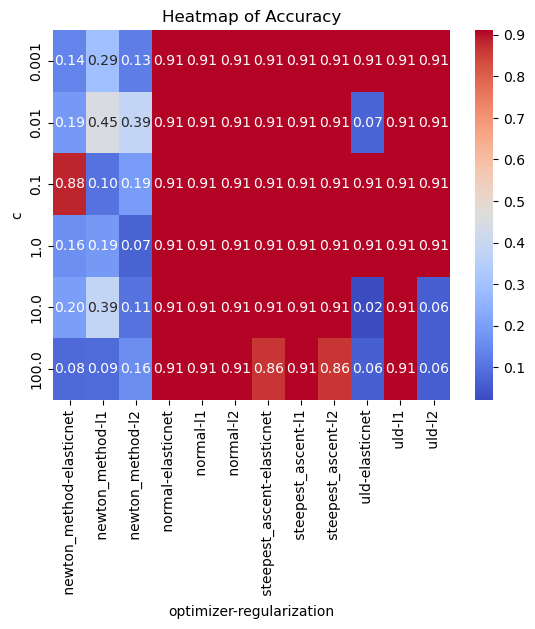

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df_results.pivot_table(values='accuracy', index=['c'], columns=['optimizer', 'regularization'])
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Accuracy")
plt.show()


<FONT COLOR="DARKGREEN">
    
As can be seen from the heatmap above, a lot of our parameters converge on a maximum accuracy of around 0.91. 
The worst performing out of all of these are newton method as it never got an accuracy higher than 0.45. 
    
We also see that the stochastic (ULD) is a little inconsistant in performance. 
Hence determining steepest assent and normal linear regression to be the best performers in terms of accuracy for our model. 
<FONT>

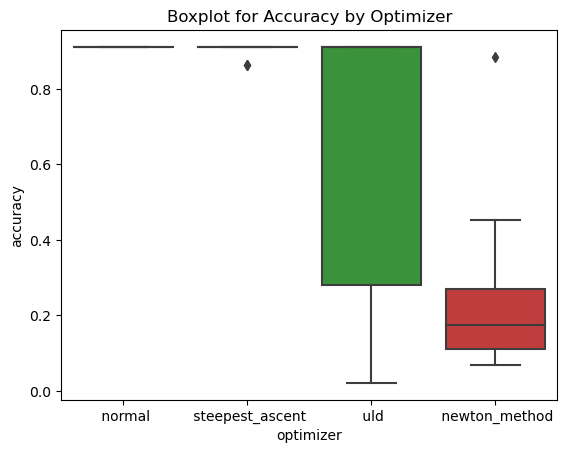

In [45]:
sns.boxplot(x='optimizer', y='accuracy', data=df_results)
plt.title('Boxplot for Accuracy by Optimizer')
plt.show()


<FONT COLOR="DARKGREEN">
    
The boxplot confirms the observations from our heatmap as the worst performing out of all of these is the newton method and the stochastic (ULD) is inconsistant in performance. 
We can also see that steepest assent and normal linear regression as the best performers in terms of accuracy for our model. However with one outlier for steepest ascent, we will choose the best performance by far (with all accuracies above 0.91)  for normal linear regression. 
<FONT>

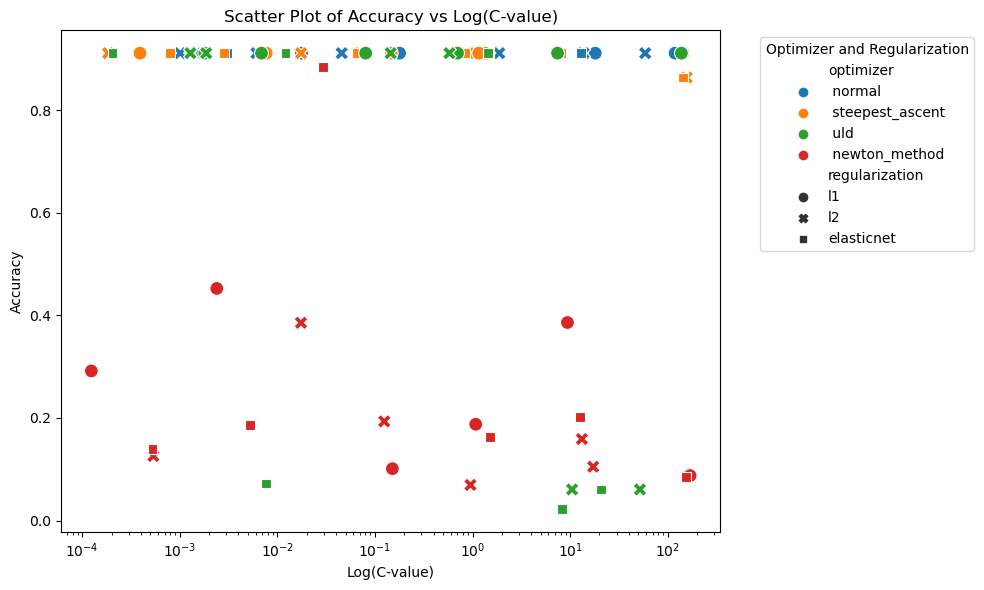

In [138]:
import numpy as np

plt.figure(figsize=(10, 6))

# Adding a small jitter to the 'c' values
jitter = 0.9  # Adjust this value based on how much jitter you want
df_results['c_jitter'] = df_results['c'] * np.random.uniform(1 - jitter, 1 + jitter, len(df_results))

sns.scatterplot(x='c_jitter', 
                y='accuracy', 
                hue='optimizer', 
                style='regularization', 
                s=100,  # marker size
                data=df_results)

plt.xscale('log')
plt.title('Scatter Plot of Accuracy vs Log(C-value)')
plt.xlabel('Log(C-value)')
plt.ylabel('Accuracy')
plt.legend(title='Optimizer and Regularization', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


<FONT COLOR="DARKGREEN">
    
The multigraph was meant to show all variables in one graph against accuracy, however, we did realize that we had to add a lot of jitter in order to make the graph readable along with log for the C value to plot it. Hence its not the most accurate representation for our data, but does show where most of the results are clumped and what type of parameters were being used for it. 
<FONT>

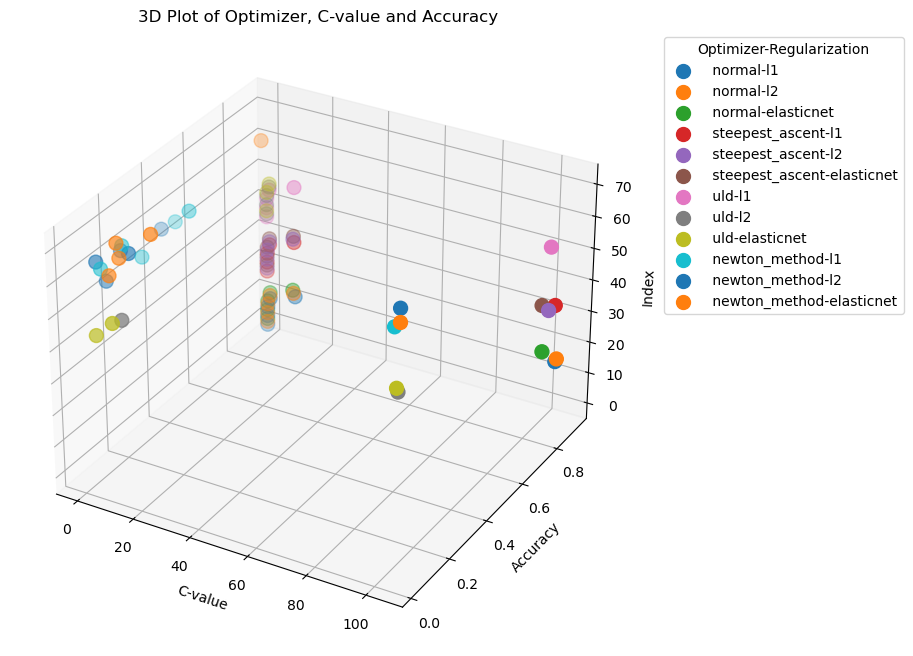

In [140]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Your DataFrame df_results

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through to plot each combination with a unique marker
for optimizer in df_results['optimizer'].unique():
    for regularization in df_results['regularization'].unique():
        subset = df_results[(df_results['optimizer'] == optimizer) & (df_results['regularization'] == regularization)]
        
        jitter = 0.05  # Adjust this based on how much jitter you want
        x_jitter = subset['c'] * np.random.uniform(1 - jitter, 1 + jitter, len(subset))
        
        ax.scatter(x_jitter, subset['accuracy'], subset.index, 
                   label=f"{optimizer}-{regularization}",
                   s=100)
        
ax.set_xlabel('C-value')
ax.set_ylabel('Accuracy')
ax.set_zlabel('Index')
ax.set_title('3D Plot of Optimizer, C-value and Accuracy')
plt.legend(title='Optimizer-Regularization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<FONT COLOR="DARKGREEN">
    
The 3d graph was a second attempt to show show all variables in one graph against accuracy, however, 3D representation in 2D form is highly hard to guage and does not perform a decent job at representing our data.  
<FONT>

### Final comparison between SKlearn and our best implementation
<FONT COLOR="DARKGREEN">
The following are from an 80/20 train/test split. 

Scikit learn on 500 iterations: 

Accuracy = 0.9225579348782634

Time = 836 ms

Our best implementation on 500 iterations: (normal logistic regression)

Accuracy = 0.9108242886476973

Time = 5.1 s
    
    
With a slightly lower accuracy level and 5X time increase, it is safe to say that we would choose SKlearn built in methods over our own implementation. 
<FONT>

### Deployment (1 points total)
Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party)? Why?

<font color="darkgreen">

We would strongly recommend using scikit-learn compared to our code.

Reasons for this preference include:

Optimization: scikit-learn is highly optimized. It is designed to be efficient both in terms of memory and speed because it uses C++. While ours was aimed only at providing an accurate answer.

Bugs: Scikit is used widely so it is less likely to have remaining bugs, and any found would get far more support

Documentation: We have only some inline comments and the headers, while scikit has proper extensive documentation and examples

Maintenance: Scikit over time gets updates to defects andoptimizations.

Reputation: For our use case a football manager would rather trust a solution based on a widely accepted framework rather than a custom solution.

Results: as you can see from the previous point where we compared the performance of our algorithm vs scikit learn there is very little difference in accuracy for a much longer compute time.

</font>